# Nature Conservancy -  Fish Detection

### Imports & environment

In [16]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

from glob import iglob, glob
from models import Vgg16BN

from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img, img_to_array

from scipy.misc import imresize, toimage


ROOT_DIR = os.getcwd()
DATA_HOME_DIR = ROOT_DIR + '/data'
%matplotlib inline

### Config & Hyperparameters

In [2]:
# paths
data_path = DATA_HOME_DIR + '/fish_detection'
split_train_path = data_path + '/train/'
valid_path = data_path + '/valid/'
saved_model_path = ROOT_DIR + '/models/fish_detector_480x270/'

# data
batch_size = 8
nb_split_train_samples = 3327
nb_full_train_samples = 3777
nb_valid_samples = 450
nb_test_samples = 1000
classes = ["NoF", "FISH"]
nb_classes = len(classes)

# model
nb_runs = 1
nb_epoch = 35
aug = True
dropout = 0.3
lr=0.001
archs = ["vggbn"]

### Train the Fish Detector Model

In [3]:
def train():
    vgg = Vgg16BN(size=(270, 480), n_classes=nb_classes, lr=lr,
              batch_size=batch_size, dropout=dropout)

    vgg.build()
    model_fn = saved_model_path + '{val_loss:.2f}-loss_{epoch}epoch' +'_480x270_{0}-dropout_{1}-lr_vggbn.h5'.format(dropout, lr)
    ckpt = ModelCheckpoint(filepath=model_fn, monitor='val_loss',
                           save_best_only=True, save_weights_only=True)

    vgg.fit_val(split_train_path, valid_path, nb_trn_samples=nb_split_train_samples, 
                         nb_val_samples=nb_valid_samples, nb_epoch=nb_epoch, callbacks=[ckpt], aug=True)

    model_path = max(iglob(saved_model_path + '*.h5'), key=os.path.getctime)
    return model_path

model_path = train()

/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


Found 3327 images belonging to 2 classes.
Found 450 images belonging to 2 classes.
Epoch 1/35
266s - loss: 1.1523 - acc: 0.7938 - val_loss: 0.7706 - val_acc: 0.8556
Epoch 2/35
265s - loss: 0.2442 - acc: 0.9312 - val_loss: 0.1456 - val_acc: 0.9489
Epoch 3/35
266s - loss: 0.1908 - acc: 0.9444 - val_loss: 0.0328 - val_acc: 0.9889
Epoch 4/35
265s - loss: 0.1558 - acc: 0.9582 - val_loss: 0.1414 - val_acc: 0.9644
Epoch 5/35
265s - loss: 0.1155 - acc: 0.9657 - val_loss: 0.1951 - val_acc: 0.9689
Epoch 6/35
265s - loss: 0.0976 - acc: 0.9757 - val_loss: 0.0548 - val_acc: 0.9889
Epoch 7/35
264s - loss: 0.0963 - acc: 0.9723 - val_loss: 0.0591 - val_acc: 0.9800
Epoch 8/35
265s - loss: 0.0907 - acc: 0.9732 - val_loss: 0.0820 - val_acc: 0.9822
Epoch 9/35
264s - loss: 0.0721 - acc: 0.9787 - val_loss: 0.1031 - val_acc: 0.9667
Epoch 10/35
264s - loss: 0.0738 - acc: 0.9787 - val_loss: 0.1422 - val_acc: 0.9756
Epoch 11/35
265s - loss: 0.0680 - acc: 0.9799 - val_loss: 0.0895 - val_acc: 0.9867
Epoch 12/35
2

### Demo

In [4]:
vgg = Vgg16BN(size=(270, 480), n_classes=nb_classes, lr=lr, batch_size=batch_size, dropout=dropout)
vgg.build()

model = vgg.model
model.load_weights(saved_model_path + '0.03-loss_2epoch_480x270_0.3-dropout_0.001-lr_vggbn.h5')

/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/robert/anaconda3/lib/python3.5/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


In [15]:
sample_fish_fns = [fn for fn in glob(valid_path + '*/*.jpg') if "NoF" not in fn]
sample_nof_fns = [fn for fn in glob(valid_path + '*/*.jpg') if "NoF" in fn]

print("fish:", len(sample_fish_fns))
print("no fish:", len(sample_nof_fns))

fish: 395
no fish: 55


Ground Truth: Fish

Fish Prob: 0.934945
NoFish Prob: 0.0650553


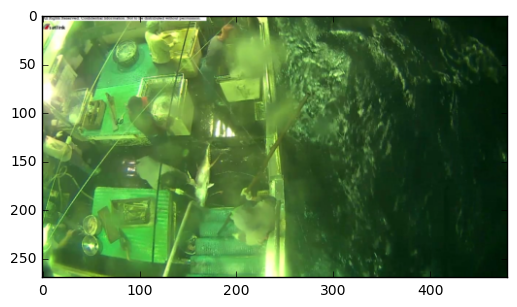

In [24]:
# Fish examples

ix = random.randint(0, len(sample_fish_fns))

im = imresize(load_img(sample_fish_fns[ix]), size=(270, 480))
test_x = img_to_array(im).reshape(1, 3, 270, 480)

pred = model.predict(test_x)[0]

print("Ground Truth: Fish\n")
print("Fish Prob:", pred[0])
print("NoFish Prob:", pred[1])

plt.imshow(im)

Ground Truth: NoFish

Fish Prob: 0.0133079
NoFish Prob: 0.986692


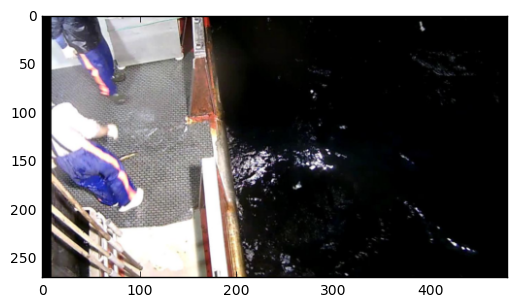

In [29]:
# NoFish examples

ix = random.randint(0, len(sample_nof_fns))

im = imresize(load_img(sample_nof_fns[ix]), size=(270, 480))
test_x = img_to_array(im).reshape(1, 3, 270, 480)

pred = model.predict(test_x)[0]

print("Ground Truth: NoFish\n")
print("Fish Prob:", pred[0])
print("NoFish Prob:", pred[1])

plt.imshow(im)